In [1]:
from time_estimation import accordion
accordion

In [2]:
from ipywidgets import *
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import sin, linspace, array

# Opensource tools and projects for researchers



- Pablo Winant

- 17/10/2016 at Bank of England


## Introduction

Quantitative research requires computational ressources / skills:
- big data econometrics
- DSGE modeling
    - estimation
    - heterogeneous agents
    - global solutions (occasionally binding constraints)
- agent based models


## Goals

- present very briefly 
    - opensource technologies
    - ongoing projects / communities
- encourage collaboration
- volunteer for help...
- discuss what can be done at the bank

# Opensource stack

- linux
- git
- Jupyter notebooks
- python / julia  [C / R / Haskell]
- libraries
- docker

## git

- Source version control
- Must have for >1000 lines of code
- Dissemination tool

## github

![title](author_count.png)

## Jupyter notebooks

Mix code, text, formulas together ($\int_{0}^{\infty} e^{-x^2}=\sqrt{\pi}/2$)

In [3]:
def fib(n): return fib(n-1)+fib(n-2) if n>1 else 1
fib(11)

144

Works with Julia too !

In [7]:
%%julia
fib(n) = (n>1 ? fib(n-1)+fib(n-2) : 1)
fib(10)

## Jupyter notebook 2

Create interactive interfaces:

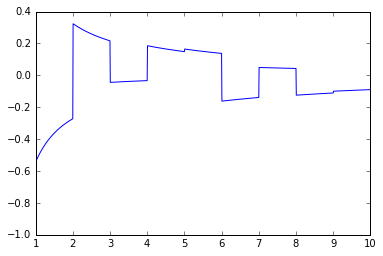

In [8]:
@interact
def plot_sincfib(a=[1,10,1]):
    inds = linspace(1,10,1000)
    vals = array( [sin(fib(i)*a)/i for i in inds] )
    plt.plot(inds,vals)
    plt.show()

## Jupyter notebook 2

- versatile: develop, distribute research, interactive interfaces, blog posts
- language agnostic (Python, Julia, R, Haskell, Matlab, ...)
- backed up by many big players (>6M from [charities](http://blog.jupyter.org/2015/07/07/jupyter-funding-2015/) + Microsoft, IBM, Google, Bloomberg)
- becoming de-facto standard for reproducible research
- full browser based solution
- many extensions
- evolving towards a full-fledged IDE (JupyterLab)

## Python

- opensource
- easy and clean syntax
- *huge* ecosystem of scientific libaries
- active community
- (OLD) good glue language for low level high-performance libaries
- (NEW) high-performance libaries can be written in Python with Numba, optional type-checks with mypy

## Python (2)

Just-in-time compilation

In [9]:
# loops are bad, aren't they ?

def stupid_loop(I,J,K):
    t = 0.0
    for i in range(I):
        for j in range(J):
            for k in range(K):
                t += 1.0
    return t
%time stupid_loop(100,100,100)

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 37.7 ms


1000000.0

## Julia

- opensource
- clean syntax, reminiscent of Matlab, 
- active community (overlaps with Python)
- already many libraries, 
- high performance targets

In [11]:
%%julia
function stupid_loop(I,J,K)
    t = 0.0
    for i=1:I
        for j=1:J
            for k = 1:K
                t += 1.0
            end        
        end
    end
    return t
end
@time [ stupid_loop(1000,1000,i) for i =1:10]

## Linux and Docker

- linux distributions: excellent development environments
- dominates the cloud
- works with Docker

In [ ]:
%%bash
pwd
ls -ll

# Dolo

## Dolo example: Sudden stop model
 simple stochastic model with occasionally binding constraints.

In [13]:
from dolo import *
model = yaml_import('sudden_stop.yaml')
dr = time_iteration(model, verbose=False)

## Dolo: make plots

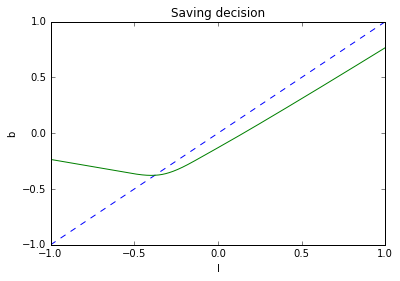

In [14]:
sim = plot_decision_rule(model, dr, 'l',n_steps=1000)
plt.plot(sim['l'], sim['l'], linestyle='--')
plt.plot(sim['l'], sim['b'])
plt.xlabel('l')
plt.ylabel('b')
plt.title('Saving decision')


## Dolo: simulate

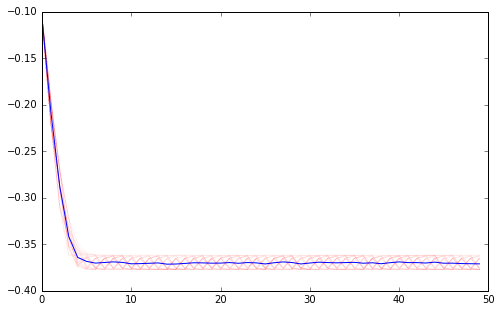

In [15]:
sim = simulate(model, dr, i_0=1, n_exp=100 )
plt.figure(figsize=(8,5))
for i in range(sim.shape[0]):
    plt.plot(sim[i]['b'], color='red', alpha=0.01)
plt.plot(sim.mean(axis=0)['b'])
plt.show()

## Dolo: past and future

- past:
    - library to solve several types of global nonlinear models
    - many optimized routines (interpolators, nonlinear solvers)
    - many options (time-iteration, perturbations, pea, gpu, ...)

## Dolo: past and future

- future:
    - general purpose *language*:  to describe and *compile*
      - equations
      - objects (markov chains,  calibration)
      - yaml structure to efficient objects
    - can be reused to build specific solvers:
      - dsge models
      - stochastic trees
      - heterogeneous agents
      - agent-based ?

Example: 

In [16]:
pcat('models_tree.yaml')

# Projects

- Originating in academia
- Opensource
    - run on an open stack
- Open communities
- Looking for contributors

## Quantecon

- funded by sloan grant (renewed in June)
- online [lectures](http://quantecon.org/)by Tom Sargent and John Stachurski
- notebook gallery (accept submissions)
- [quantecon](http://quantecon.org/) toolbox
    - general purpose economic routines
    - python and Julia
    - goal: astropy-like collection of software

## DSGE.jl fed/ny

- estimated in-house DSGE model by Marco del Negro and co.
- opensourced (including some external libraries)
- port from Matlab to Julia
    - realized with interns + quantecon people
    - easy speed-ups (x5)
- work in progress
    - identification
    - interface

## ARK

- Chris Carroll at CFPB
- Python toolbox for heterogeneous agents (Ayiagari type indexed by $i\in[0,1]$)
- Modular models for:
    - micro-models of consumer finance
    - general equilibrium
- Target: general purpose Krussell-Smith
- Launched in December 2015. Released in June 2016. Still WIP.


## Other projects

- Dynare -> Dyno.jl
- pymaclab (Eric Scheffel)
- SolveDSGE (Richard Dennis)
- ...

# Conclusion

- why opensource:
    - technological edge
    - productivity gains
    - positive externalities
    - easy to collaborate with academia
    - CB should be a natural user/contributor
- proposition:
    - internal training
    - coordinate efforts / exchange code